# **ML_PROJECT_GROUP**
#### This project focuses on developing a Machine Learning model to predict food prices across different regional markets in Tanzania. Food prices vary significantly between regions due to factors such as transportation costs, seasonal production, weather conditions, supply and demand, and local economic activities. These fluctuations can impact household food security, traders’ profitability, and government planning. By analyzing historical market data, including region, market location, commodity type, and time trends, the model learns patterns that influence price changes and generates accurate predictions. The system aims to support farmers, traders, policymakers, and consumers in making informed decisions through data-driven insights into food market trends.

In [2]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [144]:
food = pd.read_csv(r"C:\Users\Admin\Desktop\machine learning\food\Export.csv",on_bad_lines="skip")

In [24]:
file_path = r"C:\Users\Admin\Desktop\machine learning\food\Export.csv"
with open(file_path, "r", encoding="utf-8") as f:
    total_rows = sum(1 for line in f)
print("Total rows in file:", total_rows)
print("Rows loaded in DataFrame:", loan.shape[0])
skipped_rows = total_rows - loan.shape[0] - 1  # minus 1 for header
print("Skipped rows:", skipped_rows)

Total rows in file: 71511
Rows loaded in DataFrame: 62485
Skipped rows: 9025


To successfully load the dataset, the parameter on_bad_lines="skip" was used when reading the CSV file. This method was necessary because the original dataset contained some corrupted or improperly formatted rows that caused errors during loading. The file originally had 71,511 rows, but after loading it into pandas, only 62,485 rows were successfully read, meaning 9,025 problematic rows were skipped automatically. These skipped rows likely contained formatting issues such as extra commas or inconsistent column values. Using this method allowed the dataset to load without crashing the program and ensured that the remaining clean and valid data could still be used for analysis and machine learning model development.

In [26]:
food.shape

(62485, 14)

In [27]:
food.columns.values

array(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usdprice'], dtype=object)

### **Data preprocessing** 

In [29]:
# Checking the data types of all the columns
food.dtypes

date          object
admin1        object
admin2        object
market        object
latitude     float64
longitude    float64
category      object
commodity     object
unit          object
priceflag     object
pricetype     object
currency      object
price        float64
usdprice     float64
dtype: object

In [32]:
#change the data type of date from object to datetime
food['date'] = pd.to_datetime(food['date'], errors='coerce')


In [35]:
# Extract useful time features
food['year'] = food['date'].dt.year
food['month'] = food['date'].dt.month
food['day'] = food['date'].dt.day
food['week'] = food['date'].dt.isocalendar().week

In [36]:
food.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month,day,week
0,2006-01-15,Arusha,Arusha Urban,Arusha (urban),-3.366667,36.683333,cereals and tubers,Maize,100 KG,actual,Wholesale,TZS,38464.29,32.7411,2006,1,15,2
1,2006-01-15,Arusha,Arusha Urban,Arusha (urban),-3.366667,36.683333,cereals and tubers,Rice,100 KG,actual,Wholesale,TZS,63227.27,53.8196,2006,1,15,2
2,2006-01-15,Arusha,Arusha Urban,Arusha (urban),-3.366667,36.683333,pulses and nuts,Beans,100 KG,actual,Wholesale,TZS,80714.29,68.7047,2006,1,15,2
3,2006-01-15,Dar-es-salaam,Ilala,Dar Es Salaam,-6.800000,39.283333,cereals and tubers,Maize,100 KG,actual,Wholesale,TZS,38742.86,32.9783,2006,1,15,2
4,2006-01-15,Dar-es-salaam,Ilala,Dar Es Salaam,-6.800000,39.283333,cereals and tubers,Rice,100 KG,actual,Wholesale,TZS,64545.45,54.9416,2006,1,15,2


In [38]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
food.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       62485 non-null  datetime64[ns]
 1   admin1     62485 non-null  object        
 2   admin2     62485 non-null  object        
 3   market     62485 non-null  object        
 4   latitude   62485 non-null  float64       
 5   longitude  62485 non-null  float64       
 6   category   62485 non-null  object        
 7   commodity  62485 non-null  object        
 8   unit       62485 non-null  object        
 9   priceflag  62485 non-null  object        
 10  pricetype  62485 non-null  object        
 11  currency   62485 non-null  object        
 12  price      62485 non-null  float64       
 13  usdprice   62485 non-null  float64       
 14  year       62485 non-null  int32         
 15  month      62485 non-null  int32         
 16  day        62485 non-null  int32        

In [40]:
#drop some columns that are not needed
food.drop(columns=['date', 'latitude', 'longitude', 'currency', 'usdprice'], inplace=True)

In [41]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
food.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   admin1     62485 non-null  object 
 1   admin2     62485 non-null  object 
 2   market     62485 non-null  object 
 3   category   62485 non-null  object 
 4   commodity  62485 non-null  object 
 5   unit       62485 non-null  object 
 6   priceflag  62485 non-null  object 
 7   pricetype  62485 non-null  object 
 8   price      62485 non-null  float64
 9   year       62485 non-null  int32  
 10  month      62485 non-null  int32  
 11  day        62485 non-null  int32  
 12  week       62485 non-null  UInt32 
dtypes: UInt32(1), float64(1), int32(3), object(8)
memory usage: 5.3+ MB


### Dealing with missing value:

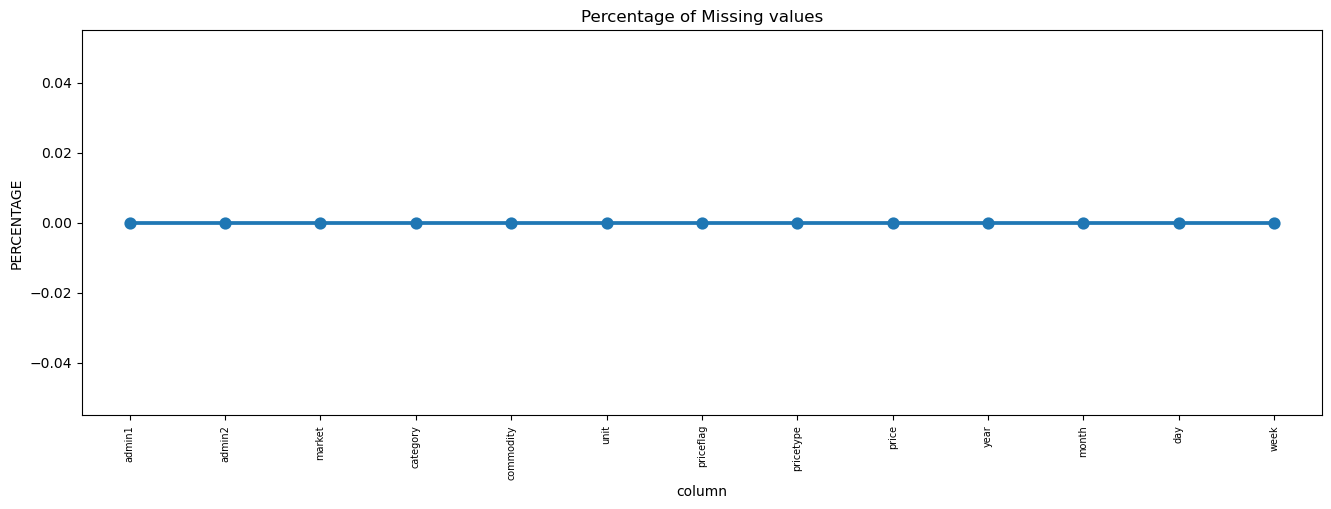

In [42]:
missing = pd.DataFrame({
    'column': food.isnull().sum().index,
    'missing_pct': food.isnull().sum().values * 100 / loan1.shape[0]
})
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='column', y='missing_pct', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Check
* All columns in the dataset (admin1, admin2, market, category, commodity, unit, priceflag, pricetype, price, year, month, day, week) have complete data with no missing values.<br>
* Notes on Handling Missing Data:<br>
* Columns with few missing values can be filled using mean/median (for numeric) or mode (for categorical).<br>
* Columns with many missing values (typically >30–40%) can be considered for removal if they add little analytical value.<br>
In this dataset, no imputation or column removal is required.

### Treatment of outliers:

In [44]:
food.columns.values

array(['admin1', 'admin2', 'market', 'category', 'commodity', 'unit',
       'priceflag', 'pricetype', 'price', 'year', 'month', 'day', 'week'],
      dtype=object)

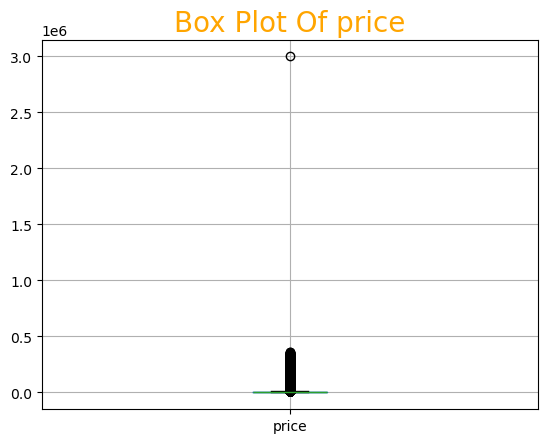

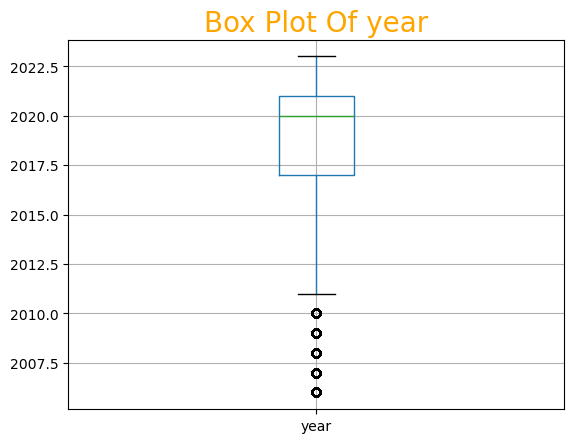

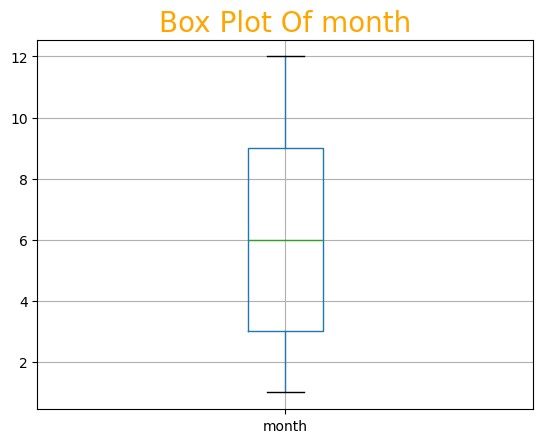

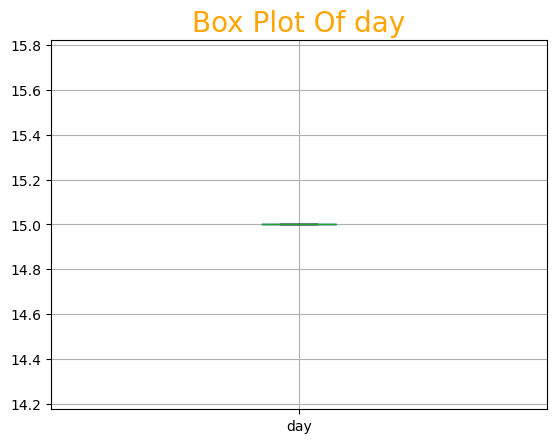

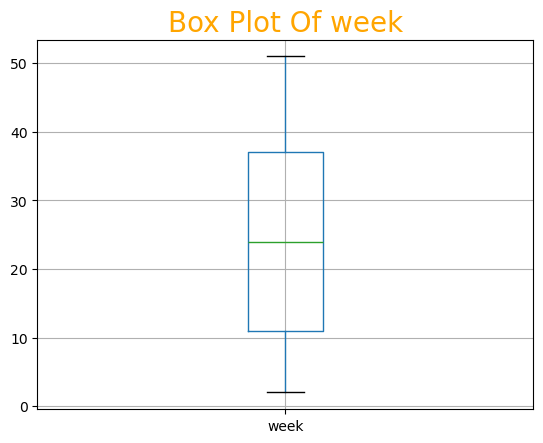

In [47]:
# boxplot all the numerical columns and see if there any outliers
for i in food[[ 'price', 'year', 'month', 'day', 'week']].columns:
    food.boxplot(column=i)
    plt.title(f"Box Plot Of {i}" , fontsize=20,
          color="orange")
    plt.show()

* Target Variable (price):<br>
price is the target variable in our prediction task. Outliers in the target reflect real extreme values in the market that the model should learn to predict.Removing or modifying these values could bias the model and reduce its ability to accurately predict high or low prices <br>
* Time-Related Features (year, month, day, week):<br>
These columns represent time information rather than continuous measurements.They have a fixed, meaningful range (e.g., month: 1–12, week: 1–52, day: 1–31), so any extreme values outside these ranges would indicate data errors, which are not present in this dataset.Since the values are valid and categorical in nature, treating them as outliers is not necessary.
* Conclusion: Outlier treatment is not required for any of these columns, as the target variable must retain its natural distribution and time-related features already have a valid fixed range.

In [55]:
columns_to_skip = ['price', 'year', 'month', 'day', 'week']

for col in food.columns:
    if col not in columns_to_skip:
        print(f"Unique values in column '{col}':")
        print(food[col].nunique())
        print(food[col].unique())
        print("-"*50)  

Unique values in column 'admin1':
25
['Arusha' 'Dar-es-salaam' 'Dodoma' 'Iringa' 'Kagera' 'Kigoma'
 'Kilimanjaro' 'Lindi' 'Manyara' 'Mara' 'Mbeya' 'Morogoro' 'Mtwara'
 'Mwanza' 'Rukwa' 'Ruvuma' 'Shinyanga' 'Singida' 'Tabora' 'Tanga' 'Katavi'
 'Njombe' 'Geita' 'Pwani' 'Simiyu']
--------------------------------------------------
Unique values in column 'admin2':
49
['Arusha Urban' 'Ilala' 'Mpwapwa' 'Iringa Urban' 'Bukoba Urban'
 'Kigoma Municipal-Ujiji' 'Moshi Municipal' 'Lindi Urban' 'Babati Urban'
 'Musoma Municipal' 'Mbeya Urban' 'Morogoro Urban' 'Mtwara Urban'
 'Nyamagana' 'Sumbawanga Urban' 'Songea Urban' 'Shinyanga Urban'
 'Singida Urban' 'Tabora Urban' 'Tanga' 'Mpanda Urban' "Wanging'ombe"
 'Geita' 'Ngorongoro' 'Temeke' 'Dodoma Urban' 'Mbogwe' 'Iringa Rural'
 'Muleba' 'Mlele' 'Kasulu' 'Mwanga' 'Liwale' 'Simanjiro' 'Butiama'
 'Chunya' 'Kilombero' 'Masasi' 'Njombe Urban' 'Kisarawe' 'Nkasi'
 'Namtumbo' 'Kahama' 'Meatu' 'Manyoni' 'Sikonge' 'Handeni' 'Kinondoni'
 'Kongwa']
------------

In [133]:
food.head()

,admin1,admin2,market,category,commodity,unit,priceflag,pricetype,price,year,month,day,week
0,Arusha,Arusha Urban,Arusha (urban),cereals and tubers,Maize,100 KG,actual,Wholesale,38464.29,2006,1,15,2
1,Arusha,Arusha Urban,Arusha (urban),cereals and tubers,Rice,100 KG,actual,Wholesale,63227.27,2006,1,15,2
2,Arusha,Arusha Urban,Arusha (urban),pulses and nuts,Beans,100 KG,actual,Wholesale,80714.29,2006,1,15,2
3,Dar-es-salaam,Ilala,Dar Es Salaam,cereals and tubers,Maize,100 KG,actual,Wholesale,38742.86,2006,1,15,2
4,Dar-es-salaam,Ilala,Dar Es Salaam,cereals and tubers,Rice,100 KG,actual,Wholesale,64545.45,2006,1,15,2


### Features Encoding:

In [63]:
# Identify categorical columns
object_columns = food.select_dtypes(include=['object','category']).columns

# Apply dummy encoding
food_dummies = pd.get_dummies(
    food,
    columns=object_columns,
    drop_first=True,   # avoid dummy variable trap
    dtype=int
)
food_dummies.head()

,price,year,month,day,week,admin1_Dar-es-salaam,admin1_Dodoma,admin1_Geita,admin1_Iringa,admin1_Kagera,...,commodity_Sweet potatoes,commodity_Tomatoes,commodity_Tomatoes (bitter),commodity_Wheat,commodity_Wheat flour,unit_KG,unit_L,unit_MT,priceflag_forecast,pricetype_Wholesale
0,38464.29,2006,1,15,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,63227.27,2006,1,15,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,80714.29,2006,1,15,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,38742.86,2006,1,15,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,64545.45,2006,1,15,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
#save the file of dummies 
food_dummies.to_csv("food_dummies.csv",index=False)

In [65]:
food1 = food_dummies.copy()

### MODEL CREATION

In [67]:
# Divide the data into dependents and independents
x=food1.drop(['price'], axis=1)
y=food1['price']

In [68]:
x

,year,month,day,week,admin1_Dar-es-salaam,admin1_Dodoma,admin1_Geita,admin1_Iringa,admin1_Kagera,admin1_Katavi,...,commodity_Sweet potatoes,commodity_Tomatoes,commodity_Tomatoes (bitter),commodity_Wheat,commodity_Wheat flour,unit_KG,unit_L,unit_MT,priceflag_forecast,pricetype_Wholesale
0,2006,1,15,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,1,15,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2006,1,15,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2006,1,15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2006,1,15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,2023,11,15,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
62481,2023,11,15,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
62482,2023,11,15,46,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
62483,2023,11,15,46,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [140]:
#variable for the x columns
X_columns = x.columns

In [69]:
# After pd.get_dummies(x)
import pickle
with open("model_columns.pkl", "wb") as f:
    pickle.dump(x.columns, f)


In [70]:
y

0        38464.29
1        63227.27
2        80714.29
3        38742.86
4        64545.45
           ...   
62480        0.00
62481        0.00
62482        0.00
62483        0.00
62484        0.00
Name: price, Length: 62485, dtype: float64

In [71]:
# Splitting the data into training & test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(f"X_train:{len(x_train)}, X_test:{len(x_test)}")

X_train:49988, X_test:12497


In [72]:
print(x_train.shape, y_train.shape)
print(x_test.shape,y_test.shape)

(49988, 168) (49988,)
(12497, 168) (12497,)


In [73]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [74]:
x_train

array([[ 0.90929814,  0.19889734,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ],
       [-0.22662578, -0.389746  ,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ],
       [ 0.90929814,  0.19889734,  0.        , ..., -0.02608881,
        -0.44865141,  1.59215867],
       ...,
       [-3.63439753,  0.49321902,  0.        , ..., -0.02608881,
        -0.44865141,  1.59215867],
       [-2.78245459,  0.49321902,  0.        , ..., -0.02608881,
        -0.44865141,  1.59215867],
       [ 0.0573552 , -1.56703269,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ]])

In [75]:
x_test

array([[ 0.62531716,  1.08186236,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ],
       [-0.79458773,  0.78754069,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ],
       [ 0.90929814,  1.67050571,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ],
       ...,
       [ 0.62531716,  1.37618404,  0.        , ..., -0.02608881,
        -0.44865141,  1.59215867],
       [-0.79458773, -1.56703269,  0.        , ..., -0.02608881,
        -0.44865141, -0.6280781 ],
       [ 0.62531716,  0.49321902,  0.        , ..., -0.02608881,
         2.22890193, -0.6280781 ]])

In [78]:
# Save the scaler
import pickle 

with open('scaler.sav', 'wb') as f:
    pickle.dump(sc, f)


# Decision Tree Regressor

In [80]:
# defining the model
model_dt= DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
model_dt.fit(x_train,y_train)


,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_l

In [101]:
# Making Predictions
y_preddt=model_dt.predict(x_test)
y_preddt

array([ 2326.56708861,  1948.36980781,  1666.34370889, ...,
       46148.67857143,  1126.12043938,     0.        ])

#### Checking performance of the model genaral

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_preddt)
mse = mean_squared_error(y_test,y_preddt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preddt)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 4276.685705827198
MSE: 158680537.64251298
RMSE: 12596.846337179515
R²: 0.9473205367811973


#### Checking performmance of the model on Test and Train data

In [120]:
# Making Predictions
y_predtr= model_dt.predict(x_train)
y_predte=model_dt.predict(x_test)


# Performance on train data
modeldt_tr_R2score=r2_score(y_train,y_predtr)
modeldt_tr_RMSE=np.sqrt(mean_squared_error(y_train,y_predtr))
modeldt_tr_MSE=mean_squared_error(y_train, y_predtr)
modeldt_tr_MAE=mean_absolute_error(y_train, y_predtr)

# Performance on test data
modeldt_te_R2score=r2_score(y_test,y_predte)
modeldt_te_RMSE=np.sqrt(mean_squared_error(y_test,y_predte))
modeldt_te_MSE=mean_squared_error(y_test,y_predte)
modeldt_te_MAE=mean_absolute_error(y_test,y_predte)

In [121]:
# Print all metrics neatly
# -----------------------------
print("===== Decision Tree Performance =====\n")
print(">>> TRAIN SET METRICS <<<")
print(f"R² Score:           {modeldt_tr_R2score:.4f}")
print(f"RMSE:               {modeldt_tr_RMSE:.4f}")
print(f"MSE:                {modeldt_tr_MSE:.4f}")
print(f"MAE:                {modeldt_tr_MAE:.4f}")

print(">>> TEST SET METRICS <<<")
print(f"R² Score:           {modeldt_te_R2score:.4f}")
print(f"RMSE:               {modeldt_te_RMSE:.4f}")
print(f"MSE:                {modeldt_te_MSE:.4f}")
print(f"MAE:                {modeldt_te_MAE:.4f}")

===== Decision Tree Performance =====

>>> TRAIN SET METRICS <<<
R² Score:           0.9102
RMSE:               16844.3364
MSE:                283731667.8174
MAE:                4175.9695
>>> TEST SET METRICS <<<
R² Score:           0.9473
RMSE:               12596.8463
MSE:                158680537.6425
MAE:                4276.6857


* The Decision Tree model shows no evidence of overfitting, as the performance on the test set (R² = 0.9473) is slightly higher than the training set (R² = 0.9102). Additionally, the error metrics (RMSE and MAE) are comparable between training and testing data, indicating strong generalization ability.

### Visualization of the model

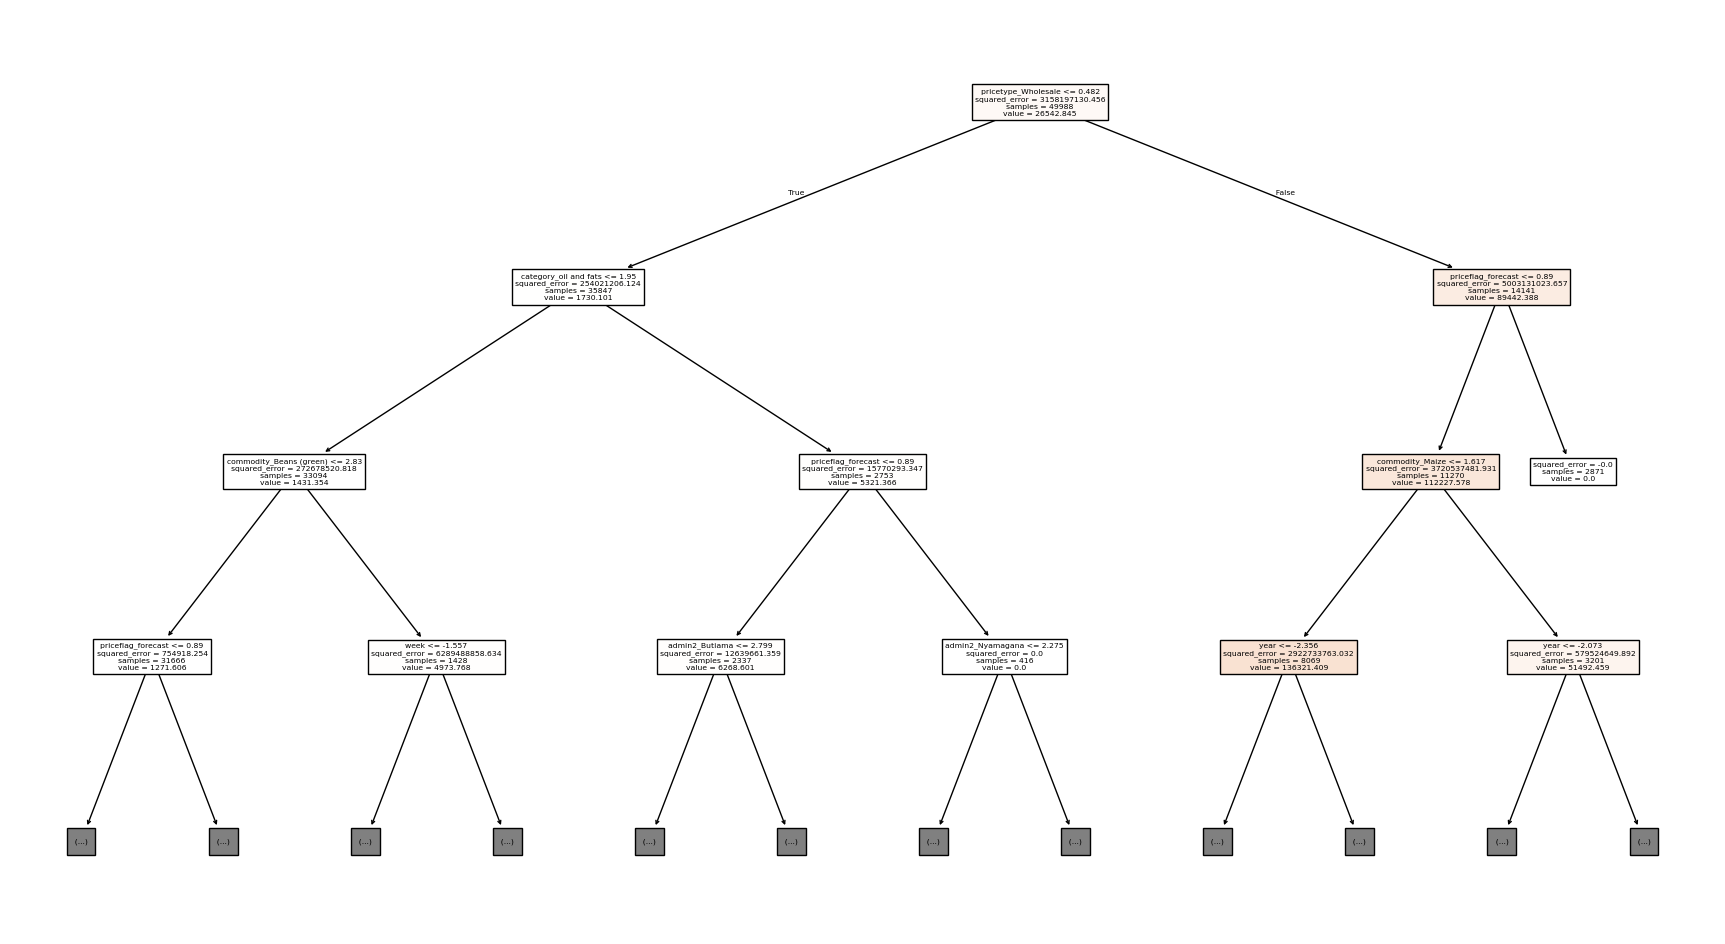

In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plot_tree(
    model_dt,
    feature_names=x.columns,  
    class_names=["No Default", "Default"],
    filled=True,
    max_depth=3
)

plt.show()



# Linear Regression

In [97]:
from sklearn.linear_model import LinearRegression
# defining the model
lr = LinearRegression()
lr.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [98]:
# Making Predictions
y_pred= lr.predict(x_test)
y_pred

array([ 13608.53329408,  -2031.13242957,  13734.78350104, ...,
        74314.70557098,   2618.41412373, -21189.90040547])

#### Checking performance of the model genaral

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 18633.715972313013
MSE: 813442528.7822312
RMSE: 28520.91388406464
R²: 0.7299497694409578


#### Checking performmance of the model on Test and Train data

In [117]:
# Making Predictions
y_predtr= lr.predict(x_train)
y_predte=lr.predict(x_test)


# Performance on train data
modellr_tr_R2score=r2_score(y_train,y_predtr)
modellr_tr_RMSE=np.sqrt(mean_squared_error(y_train,y_predtr))
modellr_tr_MSE=mean_squared_error(y_train, y_predtr)
modellr_tr_MAE=mean_absolute_error(y_train, y_predtr)

# Performance on test data
modellr_te_R2score=r2_score(y_test,y_predte)
modellr_te_RMSE=np.sqrt(mean_squared_error(y_test,y_predte))
modellr_te_MSE=mean_squared_error(y_test,y_predte)
modellr_te_MAE=mean_absolute_error(y_test,y_predte)

In [123]:
# Print all metrics neatly
# -----------------------------
print("===== Linear Regression Performance =====\n")
print(">>> TRAIN SET METRICS <<<")
print(f"R² Score:           {modellr_tr_R2score:.4f}")
print(f"RMSE:               {modellr_tr_RMSE:.4f}")
print(f"MSE:                {modellr_tr_MSE:.4f}")
print(f"MAE:                {modellr_tr_MAE:.4f}")

print(">>> TEST SET METRICS <<<")
print(f"R² Score:           {modellr_te_R2score:.4f}")
print(f"RMSE:               {modellr_te_RMSE:.4f}")
print(f"MSE:                {modellr_te_MSE:.4f}")
print(f"MAE:                {modellr_te_MAE:.4f}")

===== Linear Regression Performance =====

>>> TRAIN SET METRICS <<<
R² Score:           0.6886
RMSE:               31360.8553
MSE:                983503246.3202
MAE:                18654.5687
>>> TEST SET METRICS <<<
R² Score:           0.7299
RMSE:               28520.9139
MSE:                813442528.7822
MAE:                18633.7160


### Visualization of the model

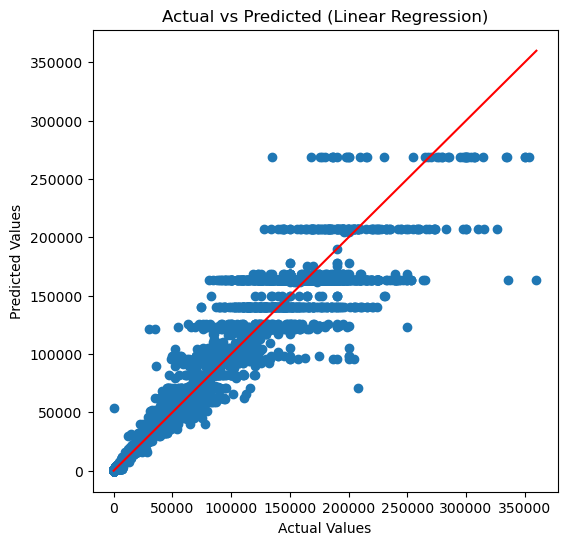

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predte)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')  # Perfect prediction line
plt.show()


* The Multiple Linear Regression model shows consistent and reliable predictive performance across both training and testing datasets. There is no evidence of overfitting, and the model explains a substantial proportion of the variation in food prices. However, further improvements could be achieved through feature engineering, model refinement, or the use of more flexible modeling approaches.

* **Conclusion:** <br>
Based on the evaluation metrics, the Decision Tree regression model significantly outperforms the Multiple Linear Regression model in predicting food prices. It achieves higher explanatory power (R²) and substantially lower prediction errors (RMSE and MAE).Therefore, the Decision Tree model is the more suitable model for this dataset, as it better captures the complex relationships present in the food price data.

In [125]:
#save the model
import pickle
with open('finalized_model.sav', 'wb') as file:
    pickle.dump(model_dt, file)


In [126]:
with open('finalized_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions
y_pred_final = loaded_model.predict(x_test)

In [129]:
y_pred_final[1]

1948.369807807808

In [141]:
print("Enter Market Price Prediction Features:")

# Categorical inputs
admin1 = input("Admin1 (e.g., Kabul): ")
admin2 = input("Admin2 (e.g., Kabul City): ")
market = input("Market name: ")
category = input("Category (e.g., cereals): ")
commodity = input("Commodity (e.g., Wheat): ")
unit = input("Unit (e.g., kg): ")
priceflag = input("Price flag (e.g., official): ")
pricetype = input("Price type (e.g., retail): ")

# Numerical inputs
year = int(input("Year (e.g., 2024): "))
month = int(input("Month (1-12): "))
day = int(input("Day (1-31): "))
week = int(input("Week number (1-52): "))

# Create DataFrame (same structure as training before encoding)
input_dict = {
    'admin1': admin1,
    'admin2': admin2,
    'market': market,
    'category': category,
    'commodity': commodity,
    'unit': unit,
    'priceflag': priceflag,
    'pricetype': pricetype,
    'year': year,
    'month': month,
    'day': day,
    'week': week
}

input_df = pd.DataFrame([input_dict])

# Apply get_dummies (same as training)
input_encoded = pd.get_dummies(input_df)

# Align columns with training data
input_encoded = input_encoded.reindex(columns=X_columns, fill_value=0)

# Apply feature scaling
input_scaled = sc.transform(input_encoded)

# Predict price
predicted_price = loaded_model.predict(input_scaled)

print("\n📊 Predicted Market Price:", predicted_price[0])


Enter Market Price Prediction Features:


Admin1 (e.g., Kabul):  Arusha
Admin2 (e.g., Kabul City):  Arusha Urban
Market name:  Arusha (urban)
Category (e.g., cereals):  cereals and tubers
Commodity (e.g., Wheat):  Maize
Unit (e.g., kg):  100 KG
Price flag (e.g., official):  actual
Price type (e.g., retail):  Wholesale
Year (e.g., 2024):  2006
Month (1-12):  1
Day (1-31):  15
Week number (1-52):  2



📊 Predicted Market Price: 31886.723396226418
